## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Standarizing the Data
#### 3. The elbow technique
#### 4. k-means clustering
#### 5. Descriptive Statistics
#### 6. Propositions
#### 7. Saving Dataset

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/aislingm/Documents/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, '6.4', 'Data', '64_boat_data.csv'))

In [5]:
df.shape

(9238, 5)

In [6]:
df.head()

,Year Built,Price_Eur,Length,Width,N. views last 7d
0,1992,14304.0,7.70,2.46,3263
1,1979,33600.0,11.12,3.88,2432
2,2002,120864.0,12.35,3.48,2261
3,2009,949000.0,20.30,5.20,2154
4,1993,19104.0,6.14,2.34,2026


Note: I am using my lastest dataset where columns were already renamed and where I had already previously in task 6.4 dropped all non numerical values. Let's just check the data types to ensure we do not run into any problems. Also null values were already addressed in previous assignments but for all intent of purpose we will double check the consistency of our dataset.

In [7]:
print(df.dtypes)

Year Built            int64
Price_Eur           float64
Length              float64
Width               float64
N. views last 7d      int64
dtype: object


In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Year Built          0
Price_Eur           0
Length              0
Width               0
N. views last 7d    0
dtype: int64


### 2. Standardizing the data

In [9]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-0.78904498 -0.17394677 -0.67005851 -0.9017764  20.07268322]
 [-1.58230415 -0.16674258 -0.09979882  0.26992313 14.71373316]
 [-0.17884562 -0.13416244  0.10529458 -0.06013308 13.61098892]
 ...
 [ 0.79747337 -0.10459581 -0.2265232  -0.4149435  -0.85366208]
 [ 0.91951324 -0.15916355 -0.88515647 -0.9100278  -0.87300847]
 [-0.11782568  0.03725662  1.43089825  1.60665076 -0.88590606]]


In [10]:
# coverting to dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

      Year Built  Price_Eur    Length     Width  N. views last 7d
0      -0.789045  -0.173947 -0.670059 -0.901776         20.072683
1      -1.582304  -0.166743 -0.099799  0.269923         14.713733
2      -0.178846  -0.134162  0.105295 -0.060133         13.610989
3       0.248294   0.175023  1.430898  1.359109         12.920968
4      -0.728025  -0.172155 -0.930177 -1.000793         12.095522
...          ...        ...       ...       ...               ...
9233    0.919513  -0.155841 -0.885156 -0.885274         -0.853662
9234    0.126254   0.380740  2.431354  2.308020         -0.853662
9235    0.797473  -0.104596 -0.226523 -0.414943         -0.853662
9236    0.919513  -0.159164 -0.885156 -0.910028         -0.873008
9237   -0.117826   0.037257  1.430898  1.606651         -0.885906

[9238 rows x 5 columns]


### 3. The elbow technique

In [11]:
from sklearn.cluster import KMeans
import pandas as pd

num_cl = range(1, 10)  # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl]  # Defines k-means clusters in the range assigned above.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]  # Creates a score that represents
# a rate of variation for the given cluster option.
score


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

[-46190.000000000065,
 -35090.03848919824,
 -30013.89903800534,
 -25041.39561845393,
 -21363.63187858458,
 -18059.410926717435,
 -15946.863466712235,
 -13982.287759548788,
 -12696.443501914247]

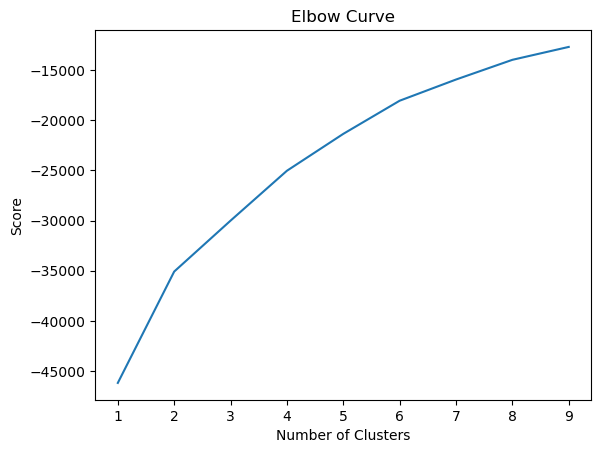

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The line begins to straiten out a bit around 5 on the x-axis. This means the optimal count for clusters will be 5

### 4. K-means clustering

In [13]:
# create an object for k-means
kmeans = KMeans(n_clusters = 5)

In [14]:
# fit the k-means into the data
kmeans.fit(df)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [15]:
kmeans = KMeans(n_clusters=5)
df['clusters'] = kmeans.fit_predict(df)
df.head()

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Year Built,Price_Eur,Length,Width,N. views last 7d,clusters
0,-0.789045,-0.173947,-0.670059,-0.901776,20.072683,4
1,-1.582304,-0.166743,-0.099799,0.269923,14.713733,4
2,-0.178846,-0.134162,0.105295,-0.060133,13.610989,4
3,0.248294,0.175023,1.430898,1.359109,12.920968,4
4,-0.728025,-0.172155,-0.930177,-1.000793,12.095522,4


In [16]:
df['clusters'].value_counts()

0    4599
1    2779
3    1475
4     354
2      31
Name: clusters, dtype: int64

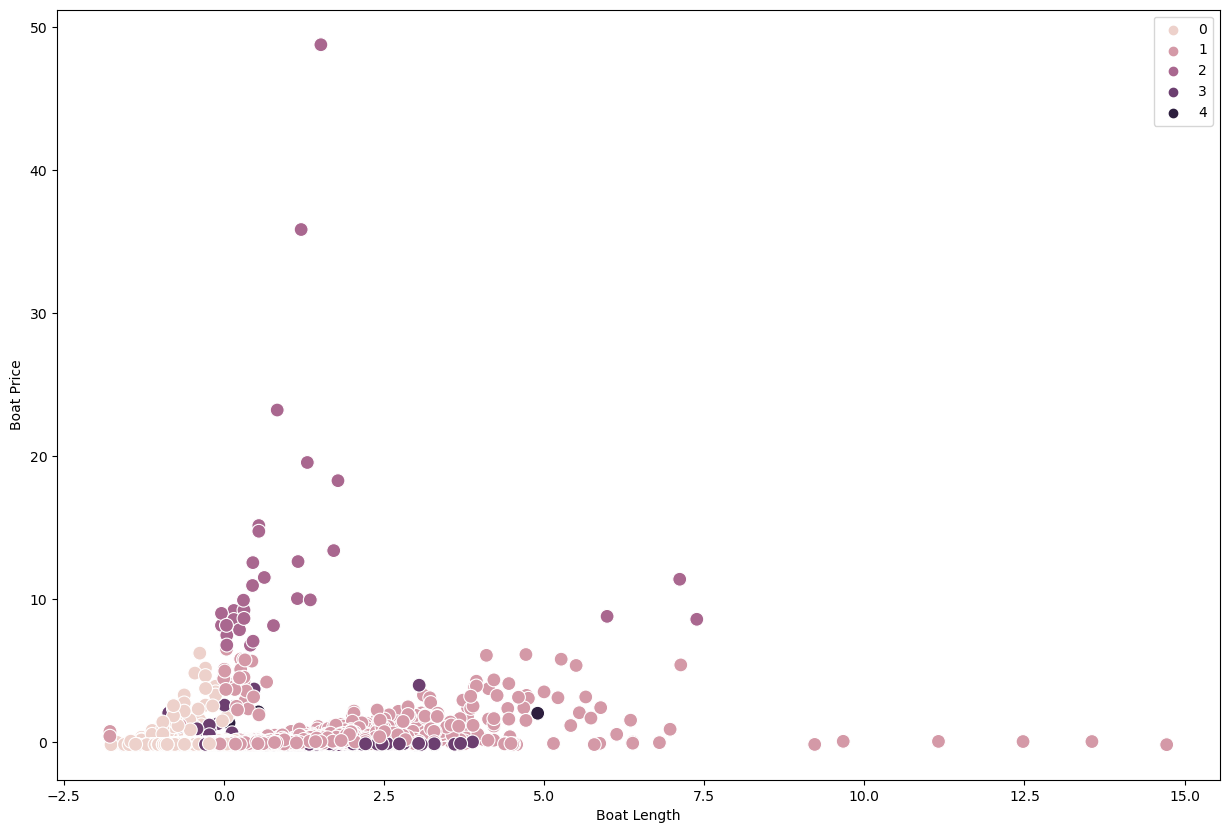

In [17]:
# plot the clusters for variables EURO Price and Length
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df['Length'], y=df['Price_Eur'], hue=kmeans.labels_, s=100)
# x and y are subsets for X to avoid using their labels
# s represents the size of the points you see in the plot
ax.grid(False) # to remove the grid from the background
plt.xlabel('Boat Length')
plt.ylabel('Boat Price')
plt.show()

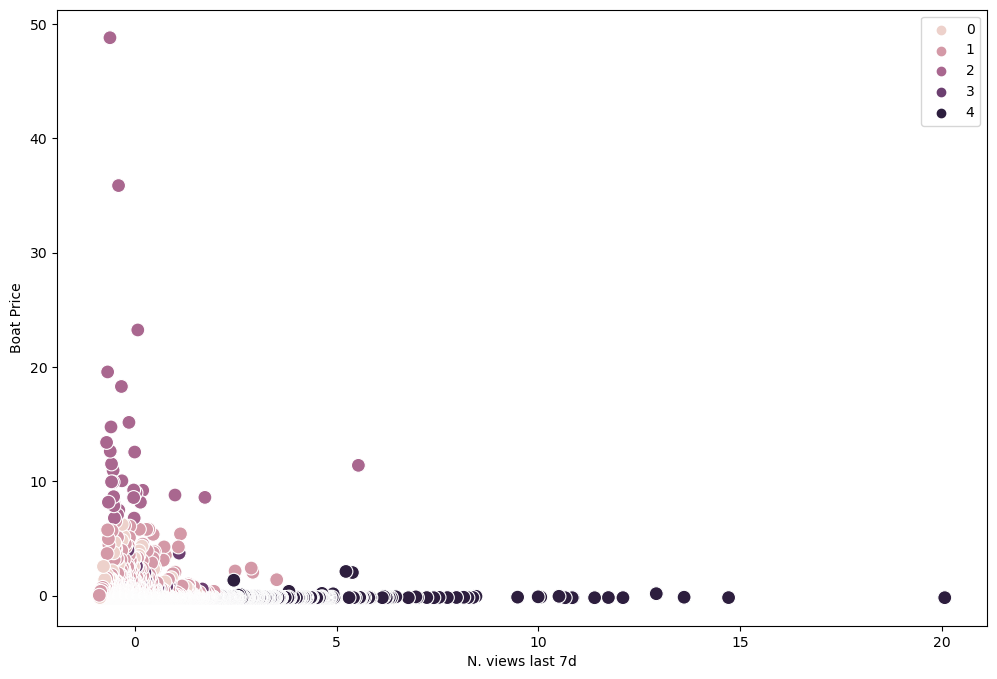

In [18]:
# Plot the clusters for the "7days_views" and "EUR_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['N. views last 7d'], y=df['Price_Eur'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('N. views last 7d') 
plt.ylabel('Boat Price') 
plt.show()

"The two graphs provided do not offer a clear indication of the correlation between the cost of a boat and its length or the number of views. While these factors may play a role in determining a boat's value, it is crucial to consider additional key factors. These factors include the type of materials used, craftsmanship, age, condition, accessories or features included, and the current market value.

Upon closer inspection, the correlation between the cost of a boat and its length or the number of views may be influenced by various other elements. For a more comprehensive analysis, it is recommended to explore the correlation with each of these factors individually. Scatter plots, histograms, or other relevant visualizations can be employed to gain insights into the relationship between the cost of the boat and factors such as craftsmanship, age, and condition.

In conclusion, a holistic approach to boat valuation is necessary, taking into account a combination of factors. Future analyses should consider collecting data on the suggested key factors to provide a more accurate representation of a boat's value in the market."

### 5. Descriptive Statistics

##### Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [19]:
df.loc[df['clusters'] == 4, 'cluster'] = 'Black'
df.loc[df['clusters'] == 3, 'cluster'] = 'Dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'Purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'Pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'Light pink'

In [20]:
df.groupby('cluster').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         'N. views last 7d':['mean', 'median'],
                          'Price_Eur':['mean', 'median']})

Length               Width           N. views last 7d  \
                 mean    median      mean    median             mean   
cluster                                                                
Black       -0.538591 -0.693402 -0.595635 -0.819262         3.631312   
Dark purple -0.115396 -0.203179 -0.168235 -0.126144         0.079647   
Light pink  -0.552221 -0.601694 -0.582656 -0.670737        -0.109253   
Pink         1.029953  0.717240  1.114708  0.872276        -0.323427   
Purple       1.235272  0.545495  1.318118  0.773259        -0.055051   

                       Price_Eur            
               median       mean    median  
cluster                                     
Black        2.922108  -0.132895 -0.166220  
Dark purple -0.092704  -0.136325 -0.160806  
Light pink  -0.253924  -0.116060 -0.153906  
Pink        -0.421593   0.137212 -0.039280  
Purple      -0.408695  12.921609  9.930994

#### 6. Propositions

Data Interpretation

Black Cluster:

Boats in this cluster, despite being smaller and potentially having fewer views, command higher prices. This suggests that other factors beyond size and views, such as quality, uniqueness, or specific features, may contribute to their higher market value.
Dark Purple Cluster:

Boats in this cluster appear to be smaller, have lower views, and lower prices. This could indicate a segment of the market with more budget-friendly or entry-level boats.
Light Pink Cluster:

Boats in this cluster are smaller, have lower views, and lower prices. This may represent a category of smaller boats with more modest features.
Pink Cluster:

Boats in this cluster are larger, have more views, and generally higher prices, although the median price is not as high. This suggests a segment where larger boats with more views are available at a range of prices, including some more affordable options.
Purple Cluster:

Boats in this cluster are larger, have higher views, and significantly higher prices. This cluster likely represents a premium segment with larger, well-viewed boats commanding higher prices.
Overall Observations:

Boat size appears to be a key factor influencing price, especially in clusters where larger boats tend to have higher prices.
The relationship between views and price is less straightforward, with some clusters showing a positive correlation, and others showing less consistent patterns.
It's crucial to consider other factors not included in the dataset, such as boat features, materials, craftsmanship, age, and market demand, to gain a more comprehensive understanding of boat valuation.
Next Steps:

Conduct further statistical analyses to validate the observed patterns.
Explore relationships between features within each cluster.
Consider collecting additional data on other relevant factors to enhance the model's accuracy in predicting boat prices.
If possible, investigate the size of each cluster to understand their representation in the dataset.


#### 7. Save Dataset

In [21]:
df.to_csv('/Users/aislingm/Documents/Achievement 6/6.5/Data/65_boat_data.csv', index=False)
